# Decision Trees 
- A Decision Tree is a structure that allows us to split the dataset into branches and then make
simple decisions at each level. This will allow us to arrive at the final decision by walking
down the tree. Decision Trees are produced by training algorithms, which identify how we
can split the data in the best possible way.  
- Any decision process starts at the root node at the top of the tree. Each node in the tree is
basically a decision rule. Algorithms construct these rules based on the relationship between
the input data and the target labels in the training data. The values in the input data are
utilized to estimate the value for the output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from utilities import visualize_classifier

- We will be using the data in the data_decision_trees.txt file that’s provided to you.
- In this file, each line contains comma-separated values.
- The first two values correspond to the input data and the last value corresponds to the target
label.
- Let’s load the data from that file

In [2]:
# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

- Separate input data into two classes based on labels

In [3]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

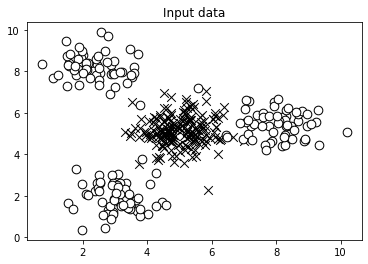

In [5]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')
plt.show()

In [7]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=5)

- Create, build, and visualize a decision tree classifier based on the training dataset.
- The __random_state__ parameter refers to the seed used by the random number generator
required for the initialization of the decision tree classification algorithm.
- The __max_depth__ parameter refers to the maximum depth of the tree that we want to con-
struct:

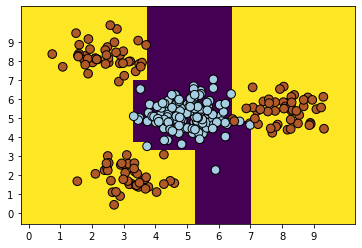

In [8]:
# Decision Trees classifier
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train)#, 'Training dataset')

- Compute the output of the classifier on the test dataset and visualize it:

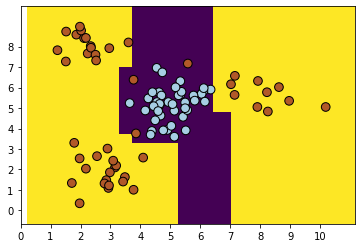

In [9]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test)#, 'Test dataset')

In [11]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



- The performance of a classifier is characterized by precision, recall, and f1-scores.
- Precision refers to the accuracy of the classification and recall refers to the number of items
that were retrieved as a percentage of the overall number of items that were supposed to be
retrieved.
2
- A good classifier will have high precision and high recall, but it is usually a trade-off between
the two. Hence we have f1-score to characterize that.
- F1 score is the harmonic mean of precision and recall, which gives it a good balance between
precision and recall values